<a href="https://colab.research.google.com/github/TheBlondMyth/AlgoTrading/blob/main/NB7.1_Optimal_Liquidation_with_Limit_Orders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimal liquidation with limit orders


---

This is a simple notebook demonstrating the numerical behaviours of the optimal limit order placement for a liquidation problem.

# Recap of the model

Recall the model consists of the following components:

* Mid-price process of the stock is $S=(S_t)_{t\geq 0}$ with $dS_t=\sigma dB_t$ where $B$ is a Brownian motion.

* Depth level of the limit sell order is $\delta=(\delta_t)_{t\geq 0}$ such that the price level of the limit sell order at time $t$ is $S_t+\delta_t$.

* Cumulative shares sold $Y=(Y_t)_{t\geq 0}$ is a Cox process with intensity function $\lambda_t=\lambda_0 e^{-\kappa \delta_t} \mathbb{I}(Q_{t-}>0)$ where $\lambda_0>0$ and $\kappa>0$ are some constants. The indicator function $\mathbb{I}(Q_{t-}>0)$ captures the constraint that no more trading can occur once all shares have been sold.

* Inventory process $Q=(Q_t)_{t\geq 0}$ is given by $Q_t=q_0-Y_t$.


* Cash process of the trader is $X=(X_t)_{t\geq 0}$ following $dX_t=(S_t+\delta_t)dY_t$.


The goal of the trader is to solve $$\sup_{\delta}\mathbb{E}\left[X_T+Q_T(S_T-\alpha Q_T)\right]$$ where $\alpha$ is the cost/penalty parameter of terminal liquidation.

# Recap of the optimal limit order placement strategy

Recall from the lecture notes, the optimal depth of the limit sell order is $\delta^*_t=\delta^*(t,Q_t)$ where
\begin{align}
\delta^*(t,q)=\frac{1}{\kappa}\left[1+\ln w(t,q)-\ln w(t,q-1)\right],\qquad q=1,2,3,..
\end{align}
with $$w(t,q)=\sum_{n=0}^q \frac{(\lambda e^{-1})^ne^{-\kappa\alpha (q-n)^2}}{n!}(T-t)^n.$$


# Numerical illustrations

The code below plots the optimal depth under different time points and current inventory levels.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def wfun(t, q, T, alpha, lam, kappa):
    sum = 0
    for n in range(q+1):
        sum = sum + (lam * np.exp(-1))**n * np.exp(-kappa * alpha * (q-n)**2) / np.math.factorial(n) * (T - t)**n
    return sum

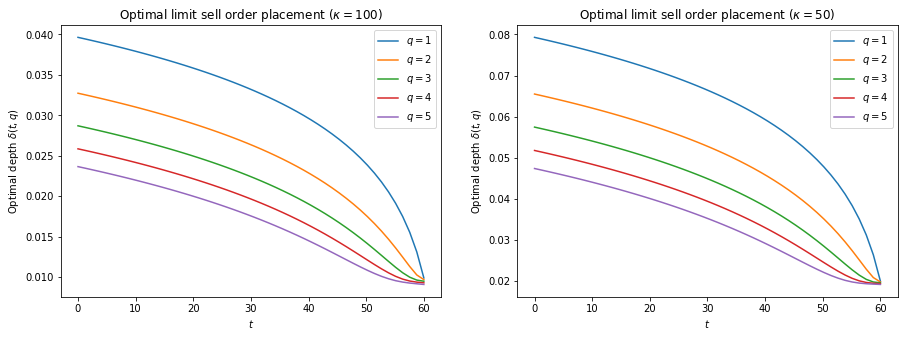

In [ ]:
T = 60
alpha = 0.0001
lam = 50/60
kappa1, kappa2 = 100, 50
q0 = 5 # initial inventory

t = np.linspace(0, T)

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15,5))

for q in range(1, q0 + 1):
    delta1 = (1 + np.log(wfun(t, q, T, alpha, lam, kappa1)) - np.log(wfun(t, q-1, T, alpha, lam, kappa1))) / kappa1
    delta2 = (1 + np.log(wfun(t, q, T, alpha, lam, kappa2)) - np.log(wfun(t, q-1, T, alpha, lam, kappa2))) / kappa2
    ax1.plot(t, delta1, label = '$q=$' + str(q))
    ax2.plot(t, delta2, label = '$q=$' + str(q))

ax1.set_xlabel(r'$t$')
ax1.set_ylabel(r'Optimal depth $\delta(t,q)$ ')
ax1.set_title(r'Optimal limit sell order placement ($\kappa=${})'.format(kappa1))
ax1.legend()

ax2.set_xlabel(r'$t$')
ax2.set_ylabel(r'Optimal depth $\delta(t,q)$ ')
ax2.set_title(r'Optimal limit sell order placement ($\kappa=${})'.format(kappa2))
ax2.legend()
